In [149]:
##################Rain in Australia dataset#################
import pandas as pd
data = pd.read_csv('weatherAUS.csv')
data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [150]:
data.info()
data.dropna(subset=['RainTomorrow'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Training , Validation and Test Sets


<AxesSubplot:title={'center':'No. of rows per year'}, xlabel='Date', ylabel='count'>

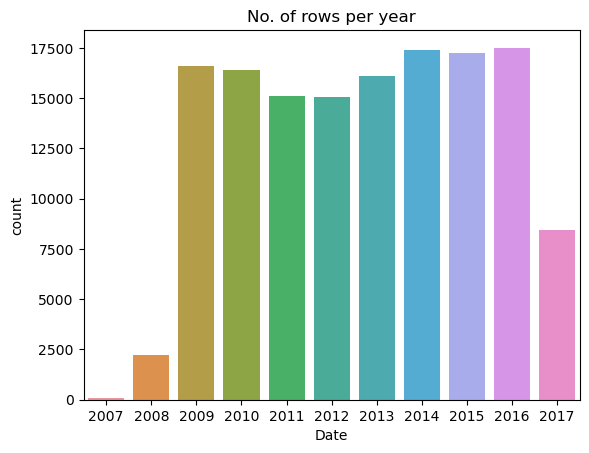

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("No. of rows per year")
sns.countplot(x=pd.to_datetime(data.Date).dt.year)

while working with chronological data it is preferred to perate training, validation and test sets with time so the model  is trained on data from  past and evaluated from data in future.
<2015-train
==2015-val
>2015-test


In [152]:
#convert year to pandas Datetime
year = pd.to_datetime(data.Date).dt.year
train_df = data[year<2015]
val_df = data[year==2015]
test_df = data[year>2015]

In [153]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [154]:
input_cols= list(train_df.columns)[1:-1]
target_cols = "RainTomorrow"

In [155]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [156]:
#identify numerical and categorical data(and convert to list)
import numpy as np
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_inputs.select_dtypes('object').columns.to_list()

In [157]:
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [158]:

from sklearn.impute import SimpleImputer

In [159]:
imputer = SimpleImputer(strategy = 'mean').fit(data[numerical_cols] )

In [160]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [161]:
#encoding categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[categorical_cols])

In [162]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27496\162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27496\162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_27496\162864322.py:2: PerformanceWarning: DataFrame is highl

In [163]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,20.4,37.6,0.0,5.469824,7.624853,54.0,0.0,7.0,46.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,20.9,33.6,0.4,5.469824,7.624853,50.0,9.0,17.0,54.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,18.4,23.1,2.2,5.469824,7.624853,48.0,11.0,39.0,62.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,17.3,23.7,15.6,5.469824,7.624853,39.0,9.0,17.0,74.0,65.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,15.5,22.9,6.8,5.469824,7.624853,31.0,6.0,9.0,92.0,63.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:


A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [164]:
#training

from sklearn.tree import DecisionTreeClassifier

#create an object of class deciontreeclassifier
model = DecisionTreeClassifier(random_state=42)




In [165]:

model.fit(X_train, train_targets)


DecisionTreeClassifier(random_state=42)

In [166]:
#evaluation

from sklearn.metrics import accuracy_score, confusion_matrix

####predicts###
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [167]:
#count number of yes and no
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [168]:
#calculate the accuracy#
accuracy_score(train_preds, train_targets)

0.9999797955307714

In [169]:
##probability###
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [170]:
model.score(X_val, val_targets)

0.792292960362138

[Text(0.5, 0.875, 'Humidity3pm <= 71.5\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 1.5\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 7.612\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 51.241\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 82.5\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 42.0\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 3.7\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

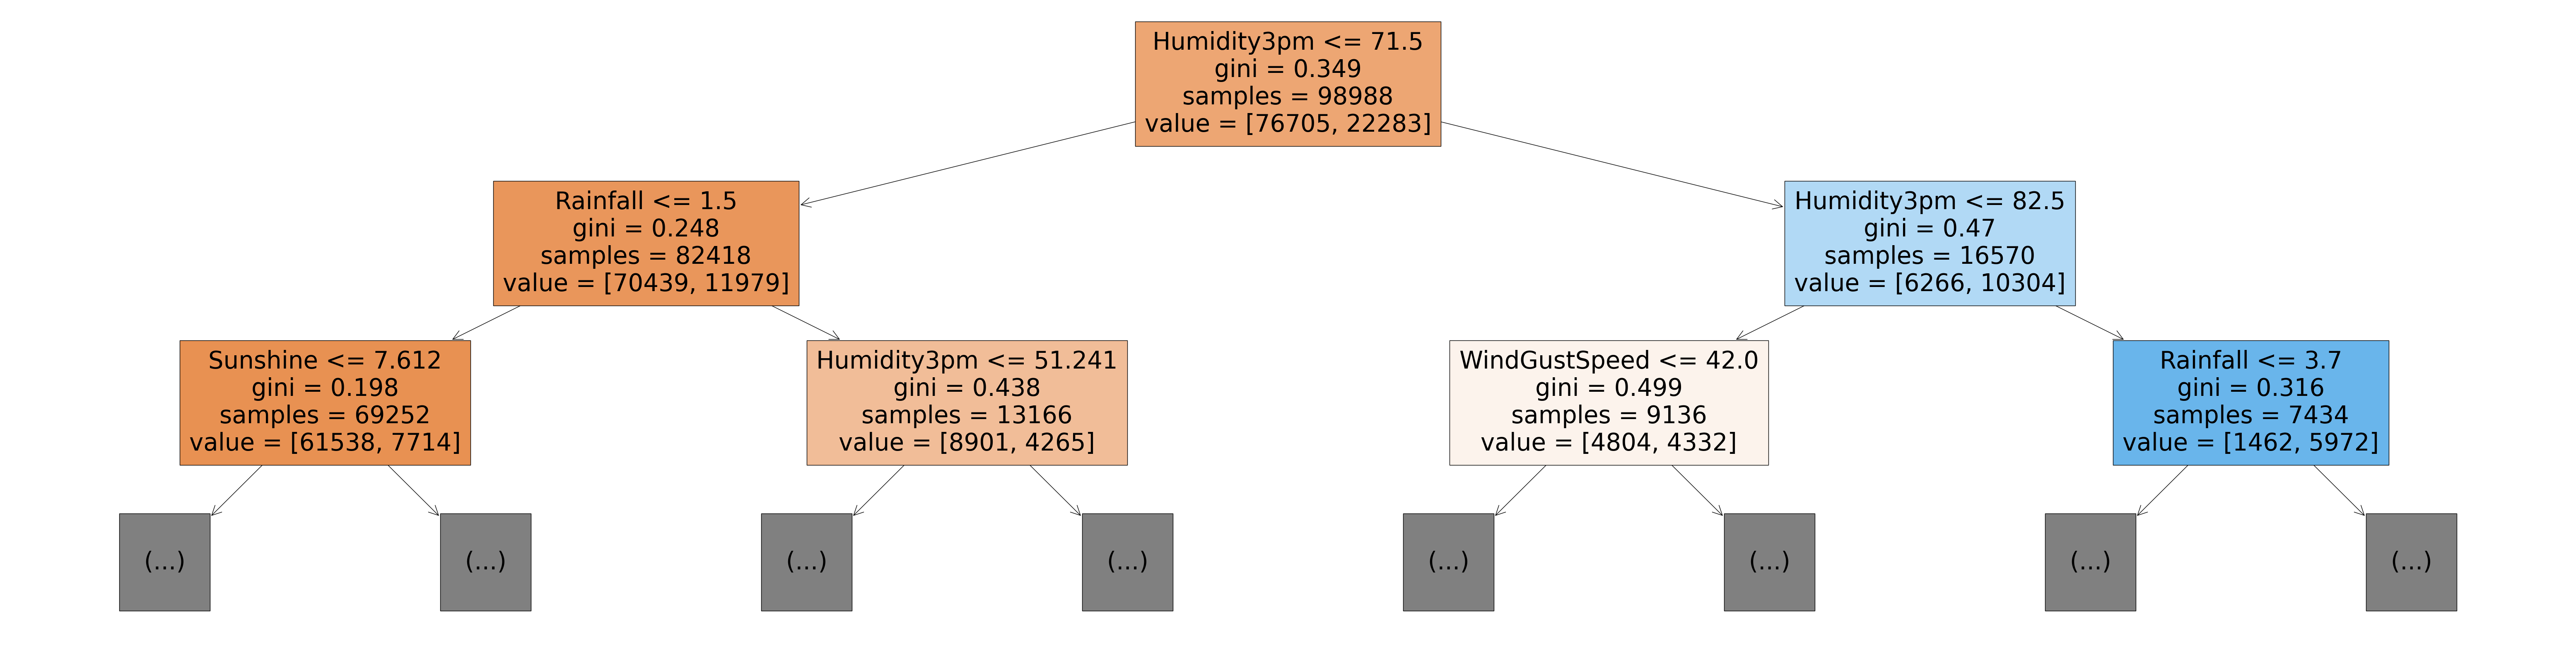

In [171]:
##visulaization of decision tree ##

from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)



In [172]:
#depth of the tree
model.tree_.max_depth

48

In [173]:
#feature importance

model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [174]:
importance_df = pd.DataFrame(
    {
    'feature':X_train.columns, 
    'importance':model.feature_importances_    }
).sort_values('importance', ascending=False)

In [175]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


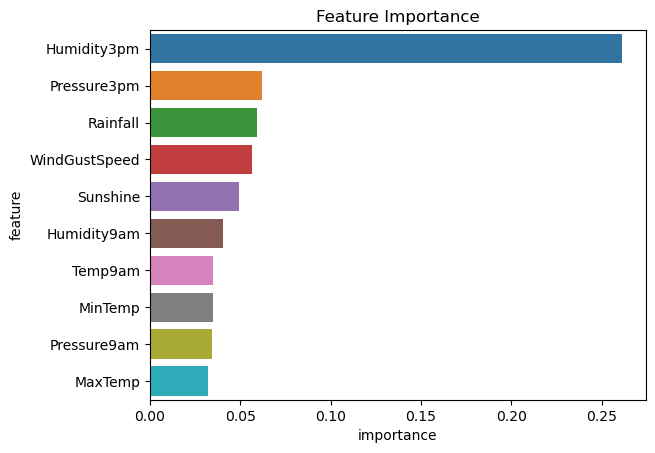

In [176]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The task to remove the condition of overfitting is using regularization..
The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting


In [177]:
#1)max_depth
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_targets)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [178]:
model.score(X_train, train_targets)

0.8291308037337859

In [179]:
model.score(X_val, val_targets)

0.8334397307178921

[Text(0.5, 0.875, 'Humidity3pm <= 71.5\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 1.5\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 7.612\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 51.241\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 82.5\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 42.0\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\nclass =

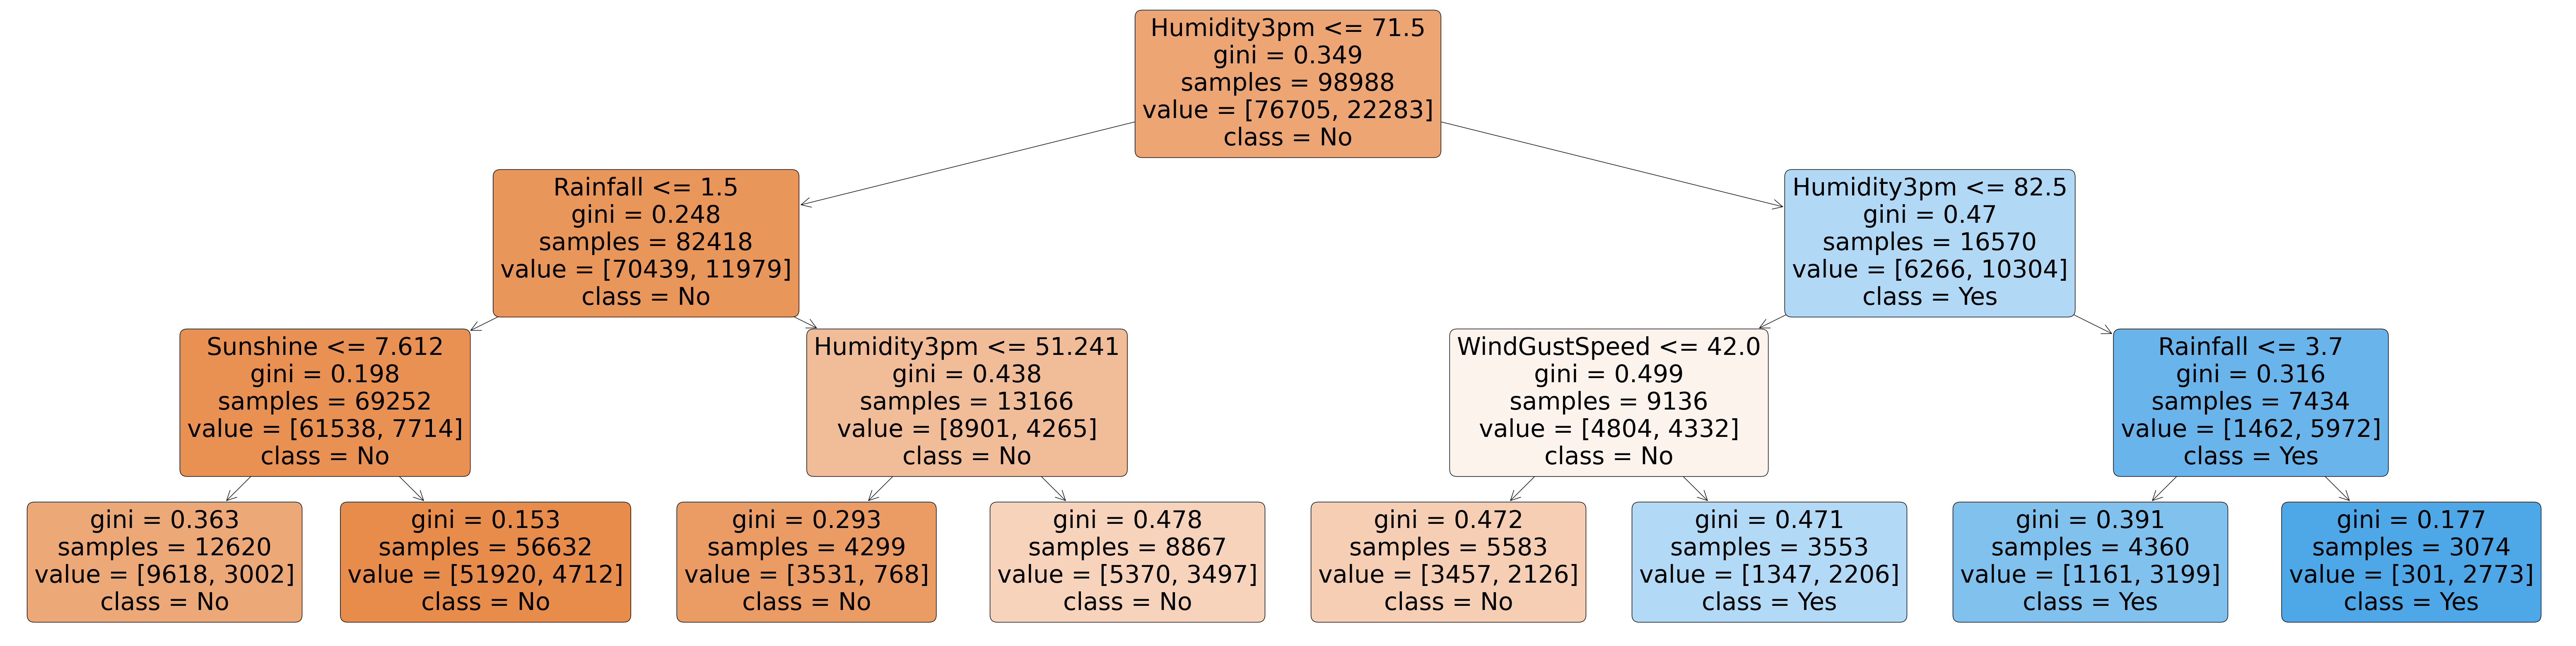

In [180]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [181]:
#2)max_leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [182]:
model.score(X_train, train_targets)


0.8480421869317493

In [183]:
model.score(X_val, val_targets)

0.8442342290058615

RANDOM FOREST TRAINING

In [184]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [185]:
model.fit(X_train, train_targets)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [187]:
model.score(X_train, train_targets)

0.9999494888269285

In [188]:
model.score(X_val, val_targets)

0.8568278103418258

In [189]:
#individual decision tree 
model.estimators_[0]


DecisionTreeClassifier(max_features='auto', random_state=1608637542)

Hyperparameter Tuning with Random Forests

In [190]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [193]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val , val_targets)

In [194]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8568278103418258)

In [195]:
#control number of random tree in a forest
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [197]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [198]:
model.score(X_train, train_targets)

0.9869479128783287